In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

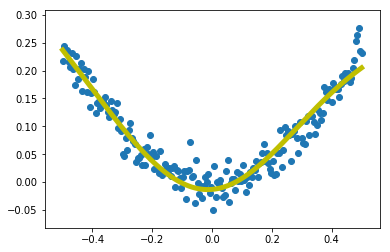

In [9]:
#产生200个随机点,随机点是一维的，给他加一维,变成200行1列
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis]
#产生一些噪声
noise=np.random.normal(0,0.02,x_data.shape)
y_data=np.square(x_data)+noise

#定义两个placeholder
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])

#构建神经网络中间层,1为输入层为一个神经元，10就是该中间层的神经元个数
w1=tf.Variable(tf.random_normal([1,10]))
b1=tf.Variable(tf.zeros([1,10]))
wxb_l1=tf.matmul(x,w1)+b1
l1=tf.nn.tanh(wxb_l1)

#定义输出层
w2=tf.Variable(tf.random_normal([10,1]))
b2=tf.Variable(tf.random_normal([1,1]))
wxb_l2=tf.matmul(l1,w2)+b2
prediction=tf.nn.tanh(wxb_l2)

#定义代价函数
loss=tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法更新
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #变量初始化也可以这样写哦
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    #获得训练结果
    prediction_value=sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'y-',lw=5)
    plt.show()
        
    
    